#### histogram comparing the energy from the pairwise model with the energy of the MCM for the same digit

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from pairwise.src.pairwise_fitter import Pairwise_fitter
from pairwise.src.pairwise_evaluator import Pairwise_evaluator
import importlib
import src.paper_utils as utils
import src.plot as myplot
import pairwise.src.pairwise_utils as pwutils

In [23]:
importlib.reload(myplot)
importlib.reload(utils)
importlib.reload(pwutils)

<module 'pairwise.src.pairwise_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots_pw/../../pairwise/src/pairwise_utils.py'>

In [16]:
nspin = 121
digits = [0,1]
outdir = "../data/OUTPUT/pairwise/OUTPUT_mod"
mods = [pwutils.get_pw_mod(i,nspin,outdir) for i in digits] # both models were stopped after 100 iterations of the ACE algorithm

In [19]:
testdatas = [np.genfromtxt(utils.load_test_data(digit), dtype=int, delimiter=1) for digit in digits]

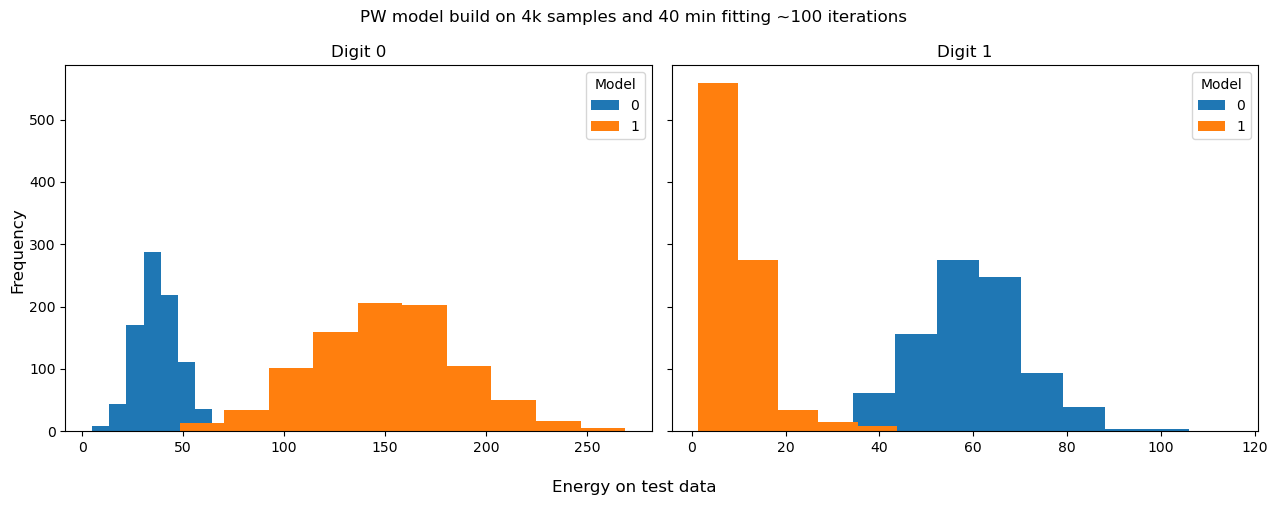

In [26]:
model_digits = [0,1]

fig, axs = plt.subplots(1,2,sharey=True,figsize=((13,5)))

for see_dig, ax in enumerate(axs):
    
    for md in model_digits:
        distrE = [mods[md].calc_energy(state) for state in testdatas[see_dig]]
        ax.hist(distrE,label=md)

    ax.set_title(f"Digit {see_dig}")
    ax.legend(title="Model")

fig.supxlabel("Energy on test data")
fig.supylabel("Frequency")
fig.suptitle("PW model build on 4k samples and 40 min fitting ~100 iterations")
fig.tight_layout()
    

#### Get same plot for mcm

In [27]:
# sample_sizes = [10, 100, 500,1000, 2000, 3000,4000,5000]
sample_sizes = [4000]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/OUTPUT/mcm/sample_sizes")
test_mcms, test_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)

In [28]:
sample_idx = 0
run_idx = 0
digit_pair = [0,1]
all_byk_pair = utils.get_all_byk_pair(test_probs, test_mcms, digit_pair, sample_idx, run_idx)

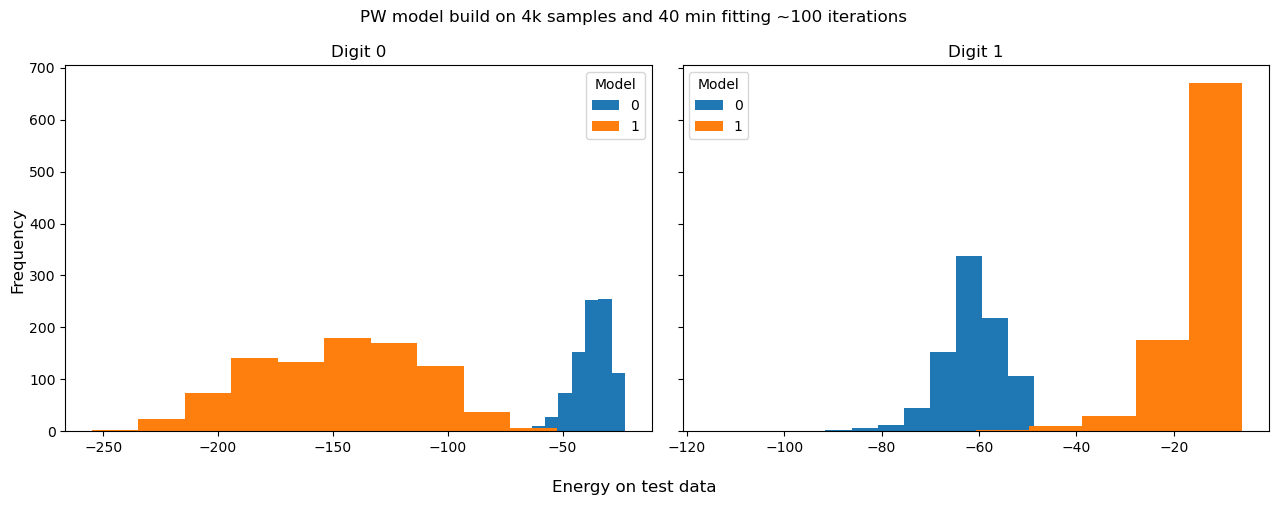

In [39]:


model_digits = [0,1]

fig, axs = plt.subplots(1,2,sharey=True,figsize=((13,5)))

for sd, ax in enumerate(axs):
    see_dig = model_digits[sd]
    for i,md in enumerate(model_digits):
        distr = np.log(all_byk_pair[i][-1,:,sd])
        ax.hist(distr,label=md)

    ax.set_title(f"Digit {see_dig}")
    ax.legend(title="Model")


fig.supxlabel("Energy on test data")
fig.supylabel("Frequency")
fig.suptitle("PW model build on 4k samples and 40 min fitting ~100 iterations")
fig.tight_layout()
    